## King model

Example of solving the well-known [King (1966)](http://adsabs.harvard.edu/abs/1966AJ.....71...64K) model for a single mass system with LIMEPY. 

First we import the limepy class

In [1]:
from limepy import limepy

Then we define the 2 parameters of the LIMEPY model: 
(1) the (dimensionless) central potential $W_0$
(2) the truncation parameter $g$ (note that for the King model $g=1$)

In [2]:
W0, g = 7, 1

Then we solve the model. If we run with verbose=True some global properties of the model are printed:

In [3]:
k = limepy(W0, g, verbose=True)


 Model properties: 
 ----------------- 
 phi0 =  7.00; g = 1.00
 Converged = True
 M =  2.494e+01; U = -4.609e+01; K = 2.305e+01; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.233; rh/r0 =  3.921; rt/r0 =  33.709; ra/rh = 25504602.664


Plotting some properties

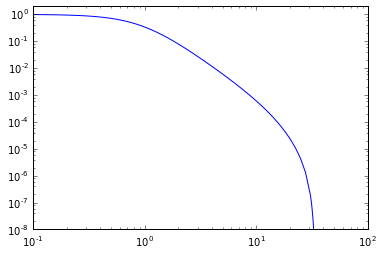

In [4]:
%matplotlib inline
import matplotlib, numpy
import matplotlib.pyplot as plt
plt.loglog()
plt.axis([1e-1, 1e2, 1e-8,2])
plt.plot(k.r, k.rho)

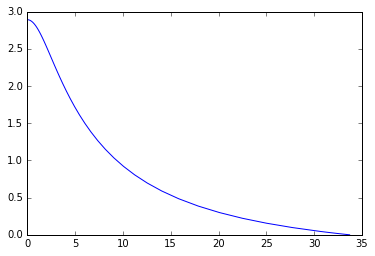

In [5]:
plt.plot(k.r, k.v2)

The model properties are in units that are convenient for solving Poisson's equation (see [section 2.1.2 Gieles & Zocchi 2015](http://adsabs.harvard.edu/abs/2015MNRAS.454..576G), or the original [King (1966)](http://adsabs.harvard.edu/abs/1966AJ.....71...64K) paper). To create a model in physical units [$M_\odot$; pc and km/s] one needs to specify a mass and radius scale, for example: 

In [6]:
k = limepy(W0, g, M=1e5, rh=3, verbose=True)

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 100000.0, rh = 3

 Model properties: 
 ----------------- 
 phi0 =  7.00; g = 1.00
 Converged = True
 M =  1.000e+05; U = -5.817e+06; K = 2.909e+06; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.233; rh/r0 =  3.921; rt/r0 =  33.709; ra/rh = 25504602.664


The central 1D velocity dispersion [km/s] is 

In [7]:
print numpy.sqrt(k.v2[0]/3)

5.50818919783


To get the properties in projection set the keyword project=True

In [8]:
k = limepy(W0, g, project=True, M=1e5, rh=3)

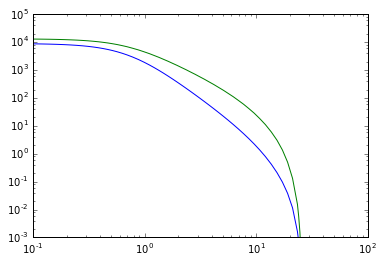

In [9]:
plt.loglog()
plt.axis([1e-1, 1e2, 1e-3,1e5])
plt.plot(k.r, k.rho)
plt.plot(k.r, k.Sigma)

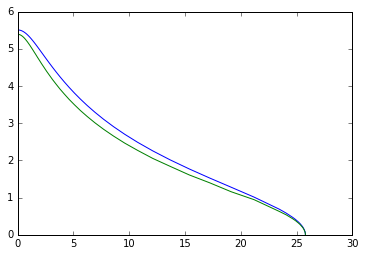

In [10]:
plt.plot(k.r, numpy.sqrt(k.v2/3))
plt.plot(k.r, numpy.sqrt(k.v2p))